In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
data_csv_4287 = pd.read_csv('dataset/youtube-comments-4287.csv')
data_csv_4287['video_id'] = 'video_1'
data_csv_1970 = pd.read_csv('dataset/youtube-comments-1970.csv')
data_csv_1970['video_id'] = 'video_2'
data_csv_399 = pd.read_csv('dataset/youtube-comments-399.csv')
data_csv_399['video_id'] = 'video_3'

##EDA

In [3]:
# Concatenate the three dataframes into one
merged_data = pd.concat([data_csv_4287, data_csv_1970, data_csv_399], ignore_index=True)

# Display the first few rows of the merged dataframe to verify
print("Merged DataFrame Head:")
display(merged_data.head())

# Display the shape of the merged dataframe to see the total number of rows and columns
print("\nMerged DataFrame Shape:")
print(merged_data.shape)

Merged DataFrame Head:


,publishedAt,authorDisplayName,textDisplay,likeCount,video_id
0,2025-11-09T13:20:35Z,@yanaatangdaryana7029,Udahhh😊😊😊😊😊😊😊😊😊😊😊😊😊,0,video_1
1,2025-11-09T13:01:12Z,@MaulidaRosulika,Aku belum dapat mbg:makan bergizi gratis,0,video_1
2,2025-11-09T12:22:23Z,@vivieanetha5624,Aku Bukan indonesia aku Malaysia,0,video_1
3,2025-11-09T12:01:46Z,@AnandaAdi-n2v,Aku udah dapet 2 minggu 😎,0,video_1
4,2025-11-09T11:23:26Z,@FanezaSgn,Aku luan dapat mbg luan,0,video_1



Merged DataFrame Shape:
(6655, 5)


##Data Duplikat

In [4]:
# Menampilkan baris data duplikat
duplicate_rows = merged_data[merged_data.duplicated()]

print("Baris Data Duplikat:")
display(duplicate_rows)

print(f"\nJumlah baris duplikat: {len(duplicate_rows)}")

Baris Data Duplikat:


,publishedAt,authorDisplayName,textDisplay,likeCount,video_id
16,2025-11-09T05:46:05Z,@irfanhaerudin4427,Aku dapat embege dari kelas dua,0,video_1
176,2025-11-04T10:32:00Z,@AdrianaWowiling,Aku kemarin dapat mbg😊😊😊😊🎉❤❤❤,0,video_1
440,2025-11-01T08:59:14Z,@AdyanNandana-t8w,Ny😊😊,0,video_1
441,2025-11-01T08:59:14Z,@AdyanNandana-t8w,Ny😊😊,0,video_1
442,2025-11-01T08:59:14Z,@AdyanNandana-t8w,Ny😊😊,0,video_1
3275,2025-10-10T02:48:15Z,@labibZaid-v2e,aku setiyap hari MBG 😊😊😊,0,video_1
6002,2025-09-26T08:25:00Z,@VeryIrawan-yl8zk,Aku belum dapat,0,video_2
6064,2025-09-25T12:22:33Z,@nusaybahshohwatulislami3459,Pertama mbg enak tapi seterus nya 😅😅 aaa 😅,0,video_2



Jumlah baris duplikat: 8


In [5]:
print("Tipe Data setelah di merge")
print(merged_data.dtypes)

Tipe Data setelah di merge
publishedAt          object
authorDisplayName    object
textDisplay          object
likeCount             int64
video_id             object
dtype: object


In [6]:
# Statistik deskriptif untuk 'likeCount'
print("Statistik Deskriptif untuk 'likeCount':\n")
print(merged_data['likeCount'].describe())

# Mengonversi 'publishedAt' menjadi objek datetime
merged_data['publishedAt'] = pd.to_datetime(merged_data['publishedAt'])

print("\nJumlah nilai unik untuk kolom-kolom kunci:")
print(f"authorDisplayName: {merged_data['authorDisplayName'].nunique()} nilai unik")
print(f"publishedAt: {merged_data['publishedAt'].nunique()} nilai unik")
print(f"textDisplay: {merged_data['textDisplay'].nunique()} nilai unik")

print("\nNilai yang paling sering muncul untuk kolom-kolom kunci:")
print(f"AuthorDisplayName yang paling sering muncul: {merged_data['authorDisplayName'].mode()[0]}")
print(f"publishedAt yang paling sering muncul: {merged_data['publishedAt'].mode()[0]}")
print(f"textDisplay yang paling sering muncul: {merged_data['textDisplay'].mode()[0]}")

# Menghitung rentang waktu untuk 'publishedAt'
time_range = merged_data['publishedAt'].max() - merged_data['publishedAt'].min()
print(f"\nRentang waktu untuk 'publishedAt': {time_range}")

# Menentukan jumlah penulis unik dan total komentar
unique_authors = merged_data['authorDisplayName'].nunique()
total_comments = merged_data.shape[0]

print(f"\nTotal jumlah penulis unik: {unique_authors}")
print(f"Total jumlah komentar: {total_comments}")


Statistik Deskriptif untuk 'likeCount':

count    6655.000000
mean        0.621938
std        14.640162
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       772.000000
Name: likeCount, dtype: float64

Jumlah nilai unik untuk kolom-kolom kunci:
authorDisplayName: 6340 nilai unik
publishedAt: 6637 nilai unik
textDisplay: 5780 nilai unik

Nilai yang paling sering muncul untuk kolom-kolom kunci:
AuthorDisplayName yang paling sering muncul: @pasbelah
publishedAt yang paling sering muncul: 2025-11-01 08:59:14+00:00
textDisplay yang paling sering muncul: Aku udah

Rentang waktu untuk 'publishedAt': 48 days 14:28:10

Total jumlah penulis unik: 6340
Total jumlah komentar: 6655


In [7]:
print(f"Jumlah node (penulis unik): {unique_authors}")
print(f"Total jumlah komentar (potensial edge/interaksi): {total_comments}")

Jumlah node (penulis unik): 6340
Total jumlah komentar (potensial edge/interaksi): 6655


In [8]:
# 1. Statistik Deskriptif untuk Metadata Pengguna/Postingan
# 1.1 Statistik untuk publishedAt (Tanggal Posting)
merged_data['publishedAt'] = pd.to_datetime(merged_data['publishedAt'], errors='coerce')
publishedAt_stats = {
    'Tanggal Terawal': merged_data['publishedAt'].min(),
    'Tanggal Terakhir': merged_data['publishedAt'].max(),
    'Rentang Waktu': merged_data['publishedAt'].max() - merged_data['publishedAt'].min(),
    'Total Postingan': len(merged_data),
    'Postingan Per Hari': merged_data.groupby(merged_data['publishedAt'].dt.date).size().mean()
}

# 1.2 Statistik untuk authorDisplayName (Nama Penulis)
author_stats = {
    'Penulis Unik': merged_data['authorDisplayName'].nunique(),
    'Postingan Per Penulis (Rata-rata)': merged_data.groupby('authorDisplayName').size().mean(),
    'Postingan Maksimum oleh Penulis': merged_data.groupby('authorDisplayName').size().max()
}

# 1.3 Statistik untuk textDisplay (Teks Postingan)
merged_data['textLength'] = merged_data['textDisplay'].apply(lambda x: len(str(x).split()))  # Menghitung panjang teks dalam kata
text_stats = {
    'Panjang Teks Rata-rata (Kata)': merged_data['textLength'].mean(),
    'Panjang Teks Maksimum (Kata)': merged_data['textLength'].max(),
    'Panjang Teks Minimum (Kata)': merged_data['textLength'].min()
}

# 1.4 Statistik untuk likeCount (Jumlah Like)
like_count_stats = merged_data['likeCount'].describe()

# Tampilkan hasil statistik deskriptif
print("Statistik Deskriptif untuk publishedAt:")
print(publishedAt_stats)
print("\nStatistik Deskriptif untuk authorDisplayName:")
print(author_stats)
print("\nStatistik Deskriptif untuk textDisplay:")
print(text_stats)
print("\nStatistik Deskriptif untuk likeCount:")
print(like_count_stats)

# 2. Ringkasan Struktur Jaringan
# 2.1 Membuat jaringan dari interaksi antara pengguna dan postingan
G = nx.Graph()

# Menambahkan nodes (Pengguna dan Postingan) ke jaringan
for _, row in merged_data.iterrows():
    author = row['authorDisplayName']
    post_id = row.name  # Atau gunakan kolom khusus yang identifikasi postingan, misalnya row['post_id']

    # Menambahkan edges antara penulis dan postingan
    G.add_edge(author, post_id)

# 2.2 Menampilkan jumlah node dan edge
node_count = len(G.nodes)
edge_count = len(G.edges)

# 2.3 Menampilkan ringkasan jaringan
print("\nRingkasan Struktur Jaringan:")
print(f"Jumlah Node (Pengguna dan Postingan): {node_count}")
print(f"Jumlah Edge (Interaksi Pengguna dan Postingan): {edge_count}")

# Opsional: Jika Anda ingin menampilkan statistik jaringan lebih lanjut:
print("\nStatistik Jaringan:")
print(f"Distribusi Degree: {dict(G.degree())}")

Statistik Deskriptif untuk publishedAt:
{'Tanggal Terawal': Timestamp('2025-09-21 23:02:19+0000', tz='UTC'), 'Tanggal Terakhir': Timestamp('2025-11-09 13:30:29+0000', tz='UTC'), 'Rentang Waktu': Timedelta('48 days 14:28:10'), 'Total Postingan': 6655, 'Postingan Per Hari': np.float64(133.1)}

Statistik Deskriptif untuk authorDisplayName:
{'Penulis Unik': 6340, 'Postingan Per Penulis (Rata-rata)': np.float64(1.0493690851735016), 'Postingan Maksimum oleh Penulis': np.int64(26)}

Statistik Deskriptif untuk textDisplay:
{'Panjang Teks Rata-rata (Kata)': np.float64(5.808264462809917), 'Panjang Teks Maksimum (Kata)': np.int64(76), 'Panjang Teks Minimum (Kata)': np.int64(1)}

Statistik Deskriptif untuk likeCount:
count    6655.000000
mean        0.621938
std        14.640162
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       772.000000
Name: likeCount, dtype: float64

Ringkasan Struktur Jaringan:
Jumlah Node (Pengguna dan Postingan): 12996
Jumlah Edge

##PREPROCESSING DATA

In [9]:
import re

# 1. Mengetahui Nilai Kosong (Missing Values)
print("\nMengetahui Missing Values:")

# Cek missing values di setiap kolom
print(merged_data.isnull().sum())

# 2. Konversi Tipe Data
# Mengonversi 'publishedAt' menjadi datetime
merged_data['publishedAt'] = pd.to_datetime(merged_data['publishedAt'], errors='coerce')

# Fungsi untuk membersihkan teks: menghapus tanda baca, angka, dan mengubah ke huruf kecil
def clean_text(text):
    text = str(text).lower()  # Mengubah teks menjadi huruf kecil
    text = re.sub(r'\s+', ' ', text)  # Mengganti spasi ganda dengan satu spasi
    text = re.sub(r'[^\w\s]', '', text)  # Menghapus tanda baca
    text = re.sub(r'\d+', '', text)  # Menghapus angka
    # Menambahkan langkah normalisasi untuk kata-kata spesifik
    text = text.replace('dapet', 'dapat') # Contoh normalisasi
    return text

# Terapkan pembersihan teks pada kolom 'textDisplay'
merged_data['textDisplay'] = merged_data['textDisplay'].apply(clean_text)

# Menampilkan beberapa baris pertama dari data yang telah diproses
print("\nData yang telah diproses:")
display(merged_data.head())


Mengetahui Missing Values:
publishedAt          0
authorDisplayName    2
textDisplay          0
likeCount            0
video_id             0
textLength           0
dtype: int64

Data yang telah diproses:


,publishedAt,authorDisplayName,textDisplay,likeCount,video_id,textLength
0,2025-11-09 13:20:35+00:00,@yanaatangdaryana7029,udahhh,0,video_1,1
1,2025-11-09 13:01:12+00:00,@MaulidaRosulika,aku belum dapat mbgmakan bergizi gratis,0,video_1,6
2,2025-11-09 12:22:23+00:00,@vivieanetha5624,aku bukan indonesia aku malaysia,0,video_1,5
3,2025-11-09 12:01:46+00:00,@AnandaAdi-n2v,aku udah dapat minggu,0,video_1,6
4,2025-11-09 11:23:26+00:00,@FanezaSgn,aku luan dapat mbg luan,0,video_1,5


##EKSTRAKSI FITUR

In [10]:
import pandas as pd
import numpy as np
import re

# Pastikan Anda sudah memiliki dataframe 'merged_data' yang telah di-merge

# 1. Fitur Waktu (Dari 'publishedAt')
# Ekstraksi tahun, bulan, hari, dan hari dalam minggu dari kolom 'publishedAt'
merged_data['year'] = merged_data['publishedAt'].dt.year
merged_data['month'] = merged_data['publishedAt'].dt.month
merged_data['day'] = merged_data['publishedAt'].dt.day
merged_data['day_of_week'] = merged_data['publishedAt'].dt.dayofweek  # 0 = Senin, 6 = Minggu
merged_data['hour'] = merged_data['publishedAt'].dt.hour  # Jam postingan

# 2. Fitur Panjang Teks

# Panjang teks dalam jumlah karakter
merged_data['text_length_characters'] = merged_data['textDisplay'].apply(lambda x: len(str(x)))

# 3. Fitur Kategorikal: Mengonversi 'authorDisplayName' menjadi kategori numerik
merged_data['author_label'] = merged_data['authorDisplayName'].astype('category').cat.codes

# Menampilkan beberapa baris pertama dari data yang telah diproses dengan fitur baru
print("\nData dengan Fitur Baru:")
display(merged_data.head())

print(merged_data.dtypes)



Data dengan Fitur Baru:


,publishedAt,authorDisplayName,textDisplay,likeCount,video_id,textLength,year,month,day,day_of_week,hour,text_length_characters,author_label
0,2025-11-09 13:20:35+00:00,@yanaatangdaryana7029,udahhh,0,video_1,1,2025,11,9,6,13,6,6232
1,2025-11-09 13:01:12+00:00,@MaulidaRosulika,aku belum dapat mbgmakan bergizi gratis,0,video_1,6,2025,11,9,6,13,39,2179
2,2025-11-09 12:22:23+00:00,@vivieanetha5624,aku bukan indonesia aku malaysia,0,video_1,5,2025,11,9,6,12,32,6178
3,2025-11-09 12:01:46+00:00,@AnandaAdi-n2v,aku udah dapat minggu,0,video_1,6,2025,11,9,6,12,23,367
4,2025-11-09 11:23:26+00:00,@FanezaSgn,aku luan dapat mbg luan,0,video_1,5,2025,11,9,6,11,23,1273


publishedAt               datetime64[ns, UTC]
authorDisplayName                      object
textDisplay                            object
likeCount                               int64
video_id                               object
textLength                              int64
year                                    int32
month                                   int32
day                                     int32
day_of_week                             int32
hour                                    int32
text_length_characters                  int64
author_label                            int16
dtype: object


##Visualisasi Topik yang dibicarakan tanpa dan dengan stopwords

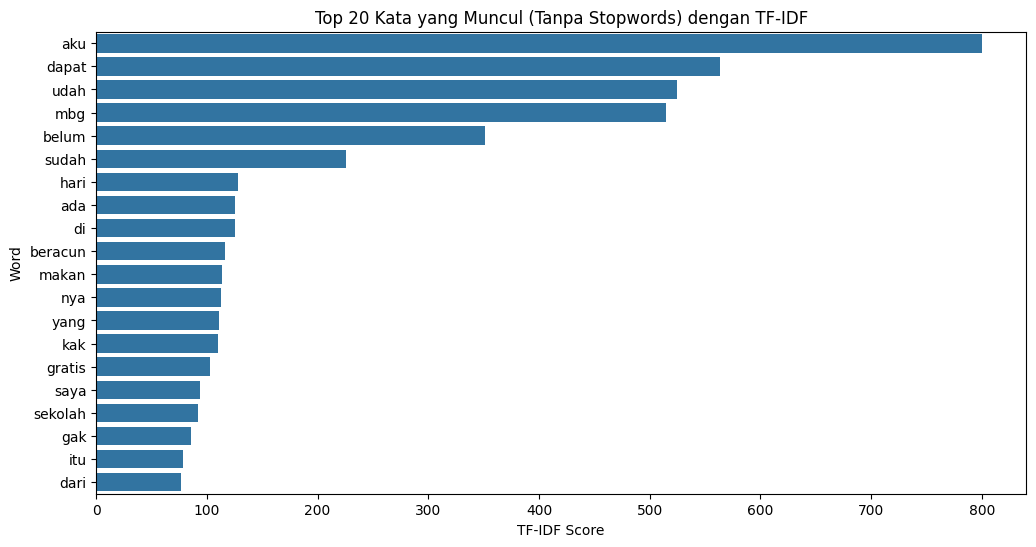

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
vectorizer_no_stopwords = TfidfVectorizer()
X_no_stopwords = vectorizer_no_stopwords.fit_transform(merged_data['textDisplay'])
tfidf_df_no_stopwords = pd.DataFrame(X_no_stopwords.toarray(), columns=vectorizer_no_stopwords.get_feature_names_out())

# Calculate the sum of TF-IDF from each word
tfidf_df_no_stopwords = tfidf_df_no_stopwords.sum().reset_index(name='jumlah')
tfidf_df_no_stopwords = tfidf_df_no_stopwords.sort_values('jumlah', ascending=False).head(20)

# Visualize the top 20 words
sns.barplot(x='jumlah', y='index', data=tfidf_df_no_stopwords)
plt.title('Top 20 Kata yang Muncul (Tanpa Stopwords) dengan TF-IDF')
plt.xlabel('TF-IDF Score')
plt.ylabel('Word')
plt.show()

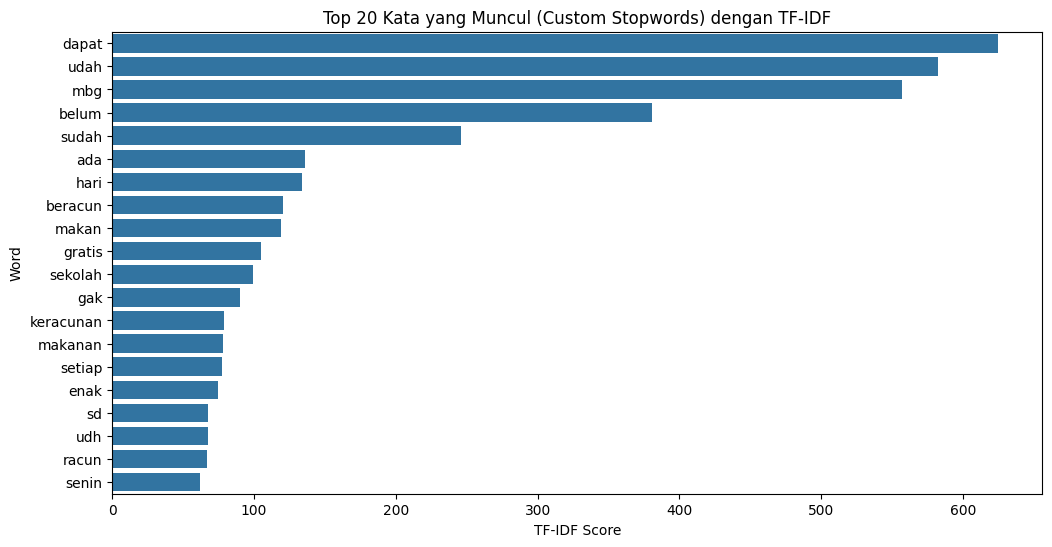

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# Definisikan daftar kata-kata yang ingin dihapus (stopwords)
custom_stopwords = ['aku','di', 'yang', 'nya', 'itu','kak','saya','dari','tapi','juga','ya'] # Contoh kata-kata yang ingin dihapus

# Instantiate TfidfVectorizer with custom stopwords
vectorizer_custom_stopwords = TfidfVectorizer(stop_words=custom_stopwords)

# Fit and transform the textDisplay column
X_custom_stopwords = vectorizer_custom_stopwords.fit_transform(merged_data['textDisplay'])

# Convert the TF-IDF matrix into a Pandas DataFrame
tfidf_df_custom_stopwords = pd.DataFrame(X_custom_stopwords.toarray(), columns=vectorizer_custom_stopwords.get_feature_names_out())

# Calculate the sum of TF-IDF scores for each word and get the top 20
tfidf_df_custom_stopwords = tfidf_df_custom_stopwords.sum().reset_index(name='jumlah')
tfidf_df_custom_stopwords = tfidf_df_custom_stopwords.sort_values('jumlah', ascending=False).head(20)

# Visualize the top 20 words
plt.figure(figsize=(12, 6))
sns.barplot(x='jumlah', y='index', data=tfidf_df_custom_stopwords)
plt.title('Top 20 Kata yang Muncul (Custom Stopwords) dengan TF-IDF')
plt.xlabel('TF-IDF Score')
plt.ylabel('Word')
plt.show()

##Jaringan Sosial Penulis dengan kesamaan Teks

In [13]:
author_corpus = (
    merged_data
    .groupby("authorDisplayName")["textDisplay"]
    .apply(lambda x: " ".join(x))
)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    stop_words=custom_stopwords,
    min_df=3,
    max_df=0.85
)

X_tfidf = vectorizer.fit_transform(author_corpus)


In [14]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

similarity_matrix = cosine_similarity(X_tfidf)

similarity_df = pd.DataFrame(
    similarity_matrix,
    index=author_corpus.index,
    columns=author_corpus.index
)


In [15]:
import networkx as nx

G = nx.Graph()
threshold = 0.3

for i in similarity_df.index:
    for j in similarity_df.columns:
        if i != j and similarity_df.loc[i, j] > threshold:
            G.add_edge(i, j, weight=similarity_df.loc[i, j])


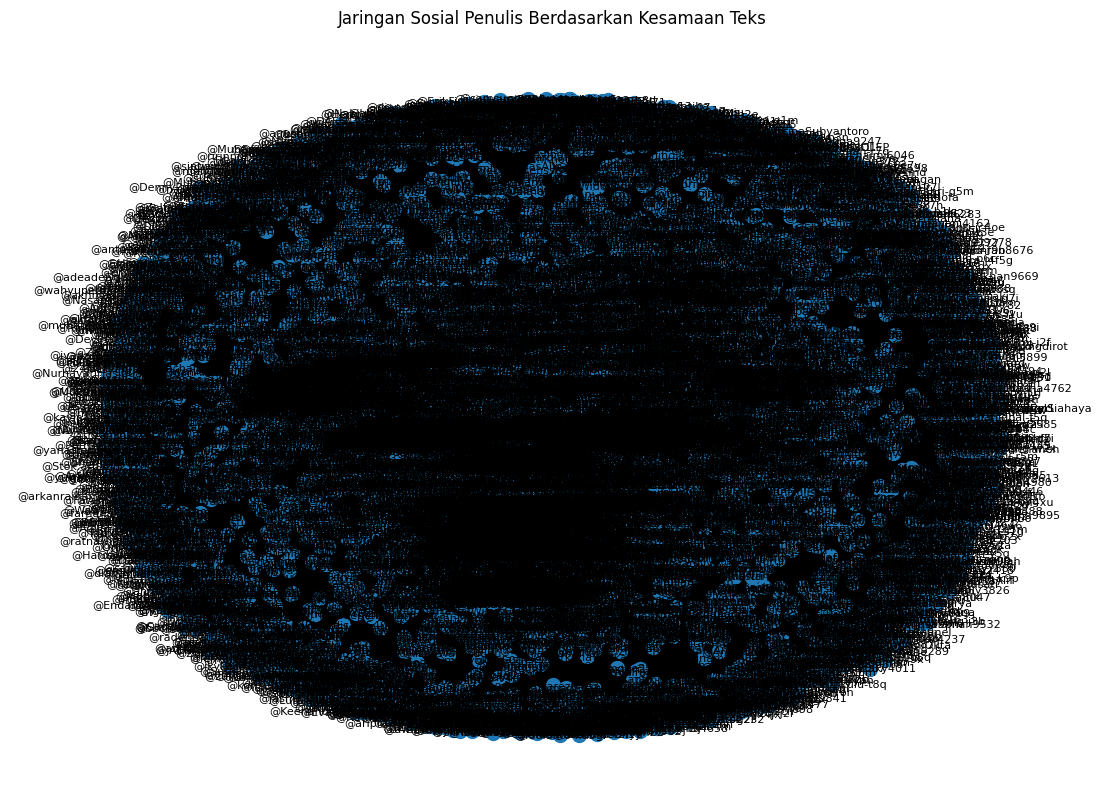

In [16]:
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=0.5)

nx.draw_networkx_nodes(G, pos, node_size=100)
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("Jaringan Sosial Penulis Berdasarkan Kesamaan Teks")
plt.axis("off")
plt.show()


In [17]:
nx.write_gexf(G, "author_text_sna.gexf")#Save Graph


##Analisis Deskriptif Tentang Jaringan Sosial

In [18]:
print(f"Jumlah Node (Penulis): {G.number_of_nodes()}")
print(f"Jumlah Edge (Koneksi Kesamaan Teks): {G.number_of_edges()}")

# Calculate average degree
average_degree = sum(dict(G.degree()).values()) / G.number_of_nodes()
print(f"Rata-rata Derajat (Average Degree): {average_degree:.2f}")

# Calculate network density
density = nx.density(G)
print(f"Kerapatan Jaringan (Network Density): {density:.4f}")

# Check for connected components (if any)
if nx.is_connected(G):
    print("Jaringan terhubung (Connected: True)")
else:
    print("Jaringan tidak terhubung (Connected: False)")
    num_components = nx.number_connected_components(G)
    print(f"Jumlah Komponen Terhubung: {num_components}")
    largest_component_nodes = len(max(nx.connected_components(G), key=len))
    print(f"Ukuran Komponen Terhubung Terbesar: {largest_component_nodes} nodes")

Jumlah Node (Penulis): 5578
Jumlah Edge (Koneksi Kesamaan Teks): 833200
Rata-rata Derajat (Average Degree): 298.75
Kerapatan Jaringan (Network Density): 0.0536
Jaringan tidak terhubung (Connected: False)
Jumlah Komponen Terhubung: 4
Ukuran Komponen Terhubung Terbesar: 5569 nodes


In [19]:
degree_centrality = nx.degree_centrality(G)

# Sort authors by degree centrality in descending order
sorted_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

print("10 Penulis Paling Sentral (berdasarkan Derajat Sentralitas):")
for author, centrality in sorted_centrality[:10]:
    print(f"Author: {author}, Degree Centrality: {centrality:.4f}")

10 Penulis Paling Sentral (berdasarkan Derajat Sentralitas):
Author: @sitiaisyahqonita, Degree Centrality: 0.2460
Author: @AdiantoCenatcenut, Degree Centrality: 0.2379
Author: @AdinataAileencaesarwijaya, Degree Centrality: 0.2379
Author: @Afid_Faturohman, Degree Centrality: 0.2379
Author: @AleshaSyafiqaHumaira-j4w, Degree Centrality: 0.2379
Author: @AnastasyaevangelistaTasya, Degree Centrality: 0.2379
Author: @AndyyantoYanto-ql6ii, Degree Centrality: 0.2379
Author: @Aniyah123-p4v, Degree Centrality: 0.2379
Author: @ArkaPutra-fl6no, Degree Centrality: 0.2379
Author: @ArmunahAliya, Degree Centrality: 0.2379


## DETEKSI BUZZER MBG

### 1. Feature Engineering untuk Deteksi Buzzer

In [20]:
# Ekstraksi fitur untuk deteksi buzzer
from sklearn.metrics.pairwise import cosine_similarity

# 1. TEMPORAL FEATURES - Pola waktu posting
user_activity = merged_data.groupby('authorDisplayName').agg({
    'publishedAt': ['count', 'min', 'max'],
    'textDisplay': 'count',
    'likeCount': 'mean'
}).reset_index()

user_activity.columns = ['author', 'comment_count', 'first_post', 'last_post', 'total_comments', 'avg_likes']

# Hitung time span (dalam jam)
user_activity['time_span_hours'] = (user_activity['last_post'] - user_activity['first_post']).dt.total_seconds() / 3600
user_activity['posting_rate'] = user_activity['comment_count'] / (user_activity['time_span_hours'] + 1)  # +1 untuk avoid division by zero

# 2. TEXT SIMILARITY FEATURES - Kesamaan antar komentar user
def calculate_user_text_similarity(author_name):
    user_comments = merged_data[merged_data['authorDisplayName'] == author_name]['textDisplay'].values
    
    if len(user_comments) < 2:
        return 0  # Tidak bisa hitung similarity jika hanya 1 komentar
    
    # Vectorize menggunakan TF-IDF
    vectorizer_temp = TfidfVectorizer()
    try:
        X_temp = vectorizer_temp.fit_transform(user_comments)
        similarity = cosine_similarity(X_temp)
        # Ambil rata-rata similarity (exclude diagonal)
        mask = ~np.eye(similarity.shape[0], dtype=bool)
        avg_similarity = similarity[mask].mean()
        return avg_similarity
    except:
        return 0

# Hitung similarity untuk setiap user (proses ini bisa memakan waktu)
print("Menghitung text similarity untuk setiap user...")
user_activity['avg_text_similarity'] = user_activity['author'].apply(calculate_user_text_similarity)

# 3. BEHAVIORAL FEATURES
# Hitung variasi panjang teks
text_length_stats = merged_data.groupby('authorDisplayName')['textLength'].agg(['mean', 'std', 'min', 'max']).reset_index()
text_length_stats.columns = ['author', 'avg_text_length', 'std_text_length', 'min_text_length', 'max_text_length']

# Merge dengan user_activity
user_activity = user_activity.merge(text_length_stats, on='author', how='left')

# Handle NaN di std (terjadi jika user hanya punya 1 komentar)
user_activity['std_text_length'].fillna(0, inplace=True)

# 4. DUPLICATE RATIO
duplicate_ratio = merged_data.groupby('authorDisplayName').apply(
    lambda x: x.duplicated(subset=['textDisplay']).sum() / len(x)
).reset_index()
duplicate_ratio.columns = ['author', 'duplicate_ratio']

user_activity = user_activity.merge(duplicate_ratio, on='author', how='left')

# 5. NETWORK FEATURES (dari analisis sebelumnya)
# Ambil degree centrality dari graph yang sudah dibuat
degree_cent_df = pd.DataFrame(list(degree_centrality.items()), columns=['author', 'degree_centrality'])
# Filter hanya author (bukan post_id)
degree_cent_df = degree_cent_df[degree_cent_df['author'].isin(user_activity['author'])]

user_activity = user_activity.merge(degree_cent_df, on='author', how='left')
user_activity['degree_centrality'].fillna(0, inplace=True)

print("\n=== FEATURE ENGINEERING SELESAI ===")
print(f"Total users: {len(user_activity)}")
print(f"\nFitur yang dibuat:")
print(user_activity.columns.tolist())

display(user_activity.head(10))

Menghitung text similarity untuk setiap user...


/var/folders/gy/zdcflj092bjghdf02m3c0j9m0000gn/T/ipykernel_85872/3670439898.py:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  user_activity['std_text_length'].fillna(0, inplace=True)



=== FEATURE ENGINEERING SELESAI ===
Total users: 6340

Fitur yang dibuat:
['author', 'comment_count', 'first_post', 'last_post', 'total_comments', 'avg_likes', 'time_span_hours', 'posting_rate', 'avg_text_similarity', 'avg_text_length', 'std_text_length', 'min_text_length', 'max_text_length', 'duplicate_ratio', 'degree_centrality']


/var/folders/gy/zdcflj092bjghdf02m3c0j9m0000gn/T/ipykernel_85872/3670439898.py:52: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  duplicate_ratio = merged_data.groupby('authorDisplayName').apply(
/var/folders/gy/zdcflj092bjghdf02m3c0j9m0000gn/T/ipykernel_85872/3670439898.py:66: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].me

,author,comment_count,first_post,last_post,total_comments,avg_likes,time_span_hours,posting_rate,avg_text_similarity,avg_text_length,std_text_length,min_text_length,max_text_length,duplicate_ratio,degree_centrality
0,@090_nurulmusthofa5,1,2025-10-03 13:22:55+00:00,2025-10-03 13:22:55+00:00,1,1.0,0.0,1.0,0.0,10.0,0.0,10,10,0.0,0.046261
1,@1360CLAN,1,2025-09-27 11:22:01+00:00,2025-09-27 11:22:01+00:00,1,31.0,0.0,1.0,0.0,30.0,0.0,30,30,0.0,0.000179
2,@1dna-z2o,1,2025-10-28 11:07:20+00:00,2025-10-28 11:07:20+00:00,1,0.0,0.0,1.0,0.0,2.0,0.0,2,2,0.0,0.024744
3,@20.radityaarosyid50,1,2025-11-04 08:26:38+00:00,2025-11-04 08:26:38+00:00,1,0.0,0.0,1.0,0.0,21.0,0.0,21,21,0.0,0.024207
4,@24MerlungJambi,1,2025-10-22 12:26:49+00:00,2025-10-22 12:26:49+00:00,1,0.0,0.0,1.0,0.0,1.0,0.0,1,1,0.0,0.001793
5,@5orangdalamkeluarga,1,2025-10-04 07:30:49+00:00,2025-10-04 07:30:49+00:00,1,0.0,0.0,1.0,0.0,5.0,0.0,5,5,0.0,0.104716
6,@A.N.J_J40,1,2025-10-30 08:09:57+00:00,2025-10-30 08:09:57+00:00,1,0.0,0.0,1.0,0.0,8.0,0.0,8,8,0.0,0.132329
7,@ABC100real,1,2025-11-04 07:27:49+00:00,2025-11-04 07:27:49+00:00,1,0.0,0.0,1.0,0.0,6.0,0.0,6,6,0.0,0.047875
8,@ADUN-cuaks,1,2025-09-28 11:13:50+00:00,2025-09-28 11:13:50+00:00,1,0.0,0.0,1.0,0.0,3.0,0.0,3,3,0.0,0.017931
9,@AGUSBasuki-t2c,1,2025-10-11 12:59:02+00:00,2025-10-11 12:59:02+00:00,1,0.0,0.0,1.0,0.0,6.0,0.0,6,6,0.0,0.074771


### 2. Rule-Based Buzzer Detection

In [21]:
# Rule-based detection: Identifikasi buzzer berdasarkan threshold

# Definisi kriteria buzzer (scoring system)
user_activity['buzzer_score'] = 0

# Kriteria 1: Posting rate tinggi (lebih dari 2 komentar per jam)
user_activity.loc[user_activity['posting_rate'] > 2, 'buzzer_score'] += 1

# Kriteria 2: Text similarity tinggi (>0.7 = copy-paste)
user_activity.loc[user_activity['avg_text_similarity'] > 0.7, 'buzzer_score'] += 2

# Kriteria 3: Banyak komentar (>10 komentar)
user_activity.loc[user_activity['comment_count'] > 10, 'buzzer_score'] += 1

# Kriteria 4: Variasi teks rendah (std < 2)
user_activity.loc[user_activity['std_text_length'] < 2, 'buzzer_score'] += 1

# Kriteria 5: Ada duplikat komentar
user_activity.loc[user_activity['duplicate_ratio'] > 0, 'buzzer_score'] += 2

# Kriteria 6: Degree centrality tinggi (terhubung dengan banyak node)
user_activity.loc[user_activity['degree_centrality'] > user_activity['degree_centrality'].quantile(0.75), 'buzzer_score'] += 1

# Klasifikasi berdasarkan score
# Score >= 4: High Suspicion (Strong Buzzer Indicator)
# Score 2-3: Medium Suspicion (Potential Buzzer)
# Score 0-1: Low Suspicion (Likely Organic User)

user_activity['buzzer_category'] = pd.cut(
    user_activity['buzzer_score'], 
    bins=[-1, 1, 3, 10], 
    labels=['Low Suspicion', 'Medium Suspicion', 'High Suspicion']
)

print("=== RULE-BASED BUZZER DETECTION ===\n")
print("Distribusi Kategori Buzzer:")
print(user_activity['buzzer_category'].value_counts())

print("\n\n=== TOP 20 SUSPECTED BUZZERS ===")
suspected_buzzers = user_activity.sort_values('buzzer_score', ascending=False).head(20)
display(suspected_buzzers[['author', 'comment_count', 'posting_rate', 'avg_text_similarity', 
                           'duplicate_ratio', 'buzzer_score', 'buzzer_category']])

# Statistik per kategori
print("\n\n=== STATISTIK PER KATEGORI ===")
for category in ['Low Suspicion', 'Medium Suspicion', 'High Suspicion']:
    cat_data = user_activity[user_activity['buzzer_category'] == category]
    print(f"\n{category}:")
    print(f"  Jumlah users: {len(cat_data)}")
    print(f"  Rata-rata komentar: {cat_data['comment_count'].mean():.2f}")
    print(f"  Rata-rata text similarity: {cat_data['avg_text_similarity'].mean():.4f}")
    print(f"  Rata-rata posting rate: {cat_data['posting_rate'].mean():.2f} komentar/jam")

=== RULE-BASED BUZZER DETECTION ===

Distribusi Kategori Buzzer:
buzzer_category
Low Suspicion       4725
Medium Suspicion    1583
High Suspicion        32
Name: count, dtype: int64


=== TOP 20 SUSPECTED BUZZERS ===


,author,comment_count,posting_rate,avg_text_similarity,duplicate_ratio,buzzer_score,buzzer_category
3742,@VeryIrawan-yl8zk,3,2.966218,1.000000,0.666667,7,High Suspicion
2642,@NurZea-z4r,5,4.928806,0.825578,0.600000,7,High Suspicion
5257,@mairaqueenofficial7303,2,1.973143,1.000000,0.500000,6,High Suspicion
5174,@labibZaid-v2e,3,2.991690,1.000000,0.666667,6,High Suspicion
6022,@susisusilawati2001,2,1.997780,1.000000,0.500000,6,High Suspicion
1639,@Inara-m6h,2,1.999445,1.000000,0.500000,6,High Suspicion
5559,@nusaybahshohwatulislami3459,3,2.993348,1.000000,0.666667,6,High Suspicion
3017,@RinaSipayung-l8b,2,1.999445,1.000000,0.500000,6,High Suspicion
109,@AdyanNandana-t8w,4,4.000000,1.000000,0.750000,6,High Suspicion
104,@AdrianaWowiling,3,2.992519,1.000000,0.666667,6,High Suspicion




=== STATISTIK PER KATEGORI ===

Low Suspicion:
  Jumlah users: 4725
  Rata-rata komentar: 1.04
  Rata-rata text similarity: 0.0033
  Rata-rata posting rate: 1.03 komentar/jam

Medium Suspicion:
  Jumlah users: 1583
  Rata-rata komentar: 1.05
  Rata-rata text similarity: 0.0058
  Rata-rata posting rate: 1.02 komentar/jam

High Suspicion:
  Jumlah users: 32
  Rata-rata komentar: 2.44
  Rata-rata text similarity: 0.8935
  Rata-rata posting rate: 2.23 komentar/jam


### 3. Unsupervised Learning: Isolation Forest untuk Anomaly Detection

In [22]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Pilih fitur untuk model
features_for_model = [
    'comment_count', 
    'posting_rate', 
    'avg_text_similarity',
    'std_text_length',
    'duplicate_ratio',
    'degree_centrality'
]

# Prepare data
X = user_activity[features_for_model].fillna(0)

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train Isolation Forest
# contamination: estimasi proporsi buzzer (misal 10%)
iso_forest = IsolationForest(
    contamination=0.1,  # Estimasi 10% adalah buzzer
    random_state=42,
    n_estimators=100
)

# Predict anomalies (-1 = anomaly/buzzer, 1 = normal)
user_activity['isolation_forest_prediction'] = iso_forest.fit_predict(X_scaled)
user_activity['isolation_forest_score'] = iso_forest.score_samples(X_scaled)

# Mapping: -1 (anomaly) -> Suspected Buzzer, 1 (normal) -> Normal User
user_activity['ml_buzzer_label'] = user_activity['isolation_forest_prediction'].map({
    -1: 'Suspected Buzzer',
    1: 'Normal User'
})

print("=== ISOLATION FOREST ANOMALY DETECTION ===\n")
print("Distribusi Hasil Prediksi:")
print(user_activity['ml_buzzer_label'].value_counts())

print("\n\n=== TOP 20 SUSPECTED BUZZERS (by ML) ===")
ml_buzzers = user_activity[user_activity['ml_buzzer_label'] == 'Suspected Buzzer'].sort_values('isolation_forest_score')
display(ml_buzzers.head(20)[['author', 'comment_count', 'posting_rate', 'avg_text_similarity', 
                              'duplicate_ratio', 'isolation_forest_score', 'ml_buzzer_label']])

=== ISOLATION FOREST ANOMALY DETECTION ===

Distribusi Hasil Prediksi:
ml_buzzer_label
Normal User         5757
Suspected Buzzer     583
Name: count, dtype: int64


=== TOP 20 SUSPECTED BUZZERS (by ML) ===


,author,comment_count,posting_rate,avg_text_similarity,duplicate_ratio,isolation_forest_score,ml_buzzer_label
460,@AqilaFatimahAz-Zahra,4,3.782506,0.739290,0.500000,-0.838124,Suspected Buzzer
2642,@NurZea-z4r,5,4.928806,0.825578,0.600000,-0.813979,Suspected Buzzer
109,@AdyanNandana-t8w,4,4.000000,1.000000,0.750000,-0.807509,Suspected Buzzer
5559,@nusaybahshohwatulislami3459,3,2.993348,1.000000,0.666667,-0.802064,Suspected Buzzer
3742,@VeryIrawan-yl8zk,3,2.966218,1.000000,0.666667,-0.801425,Suspected Buzzer
3700,@UgiAjah-t1b,3,2.968664,0.372147,0.333333,-0.800979,Suspected Buzzer
104,@AdrianaWowiling,3,2.992519,1.000000,0.666667,-0.789420,Suspected Buzzer
5174,@labibZaid-v2e,3,2.991690,1.000000,0.666667,-0.789420,Suspected Buzzer
240,@Alanfrandika-hx4ux,9,5.224121,0.164029,0.000000,-0.787012,Suspected Buzzer
5257,@mairaqueenofficial7303,2,1.973143,1.000000,0.500000,-0.786913,Suspected Buzzer


### 4. Perbandingan Rule-Based vs Machine Learning

In [23]:
# Perbandingan hasil deteksi
comparison = pd.crosstab(
    user_activity['buzzer_category'], 
    user_activity['ml_buzzer_label'],
    margins=True
)

print("=== PERBANDINGAN RULE-BASED vs MACHINE LEARNING ===\n")
print("Confusion Matrix:")
display(comparison)

# Users yang terdeteksi oleh KEDUA metode (High confidence)
high_confidence_buzzers = user_activity[
    (user_activity['buzzer_category'] == 'High Suspicion') & 
    (user_activity['ml_buzzer_label'] == 'Suspected Buzzer')
]

print(f"\n\n=== HIGH CONFIDENCE BUZZERS (Terdeteksi oleh kedua metode) ===")
print(f"Total: {len(high_confidence_buzzers)} users\n")
display(high_confidence_buzzers[['author', 'comment_count', 'posting_rate', 'avg_text_similarity', 
                                   'duplicate_ratio', 'buzzer_score', 'isolation_forest_score']]
        .sort_values('buzzer_score', ascending=False))

# Agreement rate
total_high_suspicion_rule = len(user_activity[user_activity['buzzer_category'] == 'High Suspicion'])
total_suspected_ml = len(user_activity[user_activity['ml_buzzer_label'] == 'Suspected Buzzer'])
overlap = len(high_confidence_buzzers)

print(f"\n\n=== AGREEMENT ANALYSIS ===")
print(f"Rule-Based High Suspicion: {total_high_suspicion_rule} users")
print(f"ML Suspected Buzzers: {total_suspected_ml} users")
print(f"Overlap (Both methods): {overlap} users")
if total_suspected_ml > 0:
    print(f"Agreement Rate: {(overlap/total_suspected_ml)*100:.2f}%")

=== PERBANDINGAN RULE-BASED vs MACHINE LEARNING ===

Confusion Matrix:


ml_buzzer_label,Normal User,Suspected Buzzer,All
buzzer_category,,,
Low Suspicion,4556,169,4725
Medium Suspicion,1201,382,1583
High Suspicion,0,32,32
All,5757,583,6340




=== HIGH CONFIDENCE BUZZERS (Terdeteksi oleh kedua metode) ===
Total: 32 users



,author,comment_count,posting_rate,avg_text_similarity,duplicate_ratio,buzzer_score,isolation_forest_score
3742,@VeryIrawan-yl8zk,3,2.966218,1.000000,0.666667,7,-0.801425
2642,@NurZea-z4r,5,4.928806,0.825578,0.600000,7,-0.813979
104,@AdrianaWowiling,3,2.992519,1.000000,0.666667,6,-0.789420
1639,@Inara-m6h,2,1.999445,1.000000,0.500000,6,-0.785849
6022,@susisusilawati2001,2,1.997780,1.000000,0.500000,6,-0.766891
5559,@nusaybahshohwatulislami3459,3,2.993348,1.000000,0.666667,6,-0.802064
5257,@mairaqueenofficial7303,2,1.973143,1.000000,0.500000,6,-0.786913
5174,@labibZaid-v2e,3,2.991690,1.000000,0.666667,6,-0.789420
109,@AdyanNandana-t8w,4,4.000000,1.000000,0.750000,6,-0.807509
3017,@RinaSipayung-l8b,2,1.999445,1.000000,0.500000,6,-0.754209




=== AGREEMENT ANALYSIS ===
Rule-Based High Suspicion: 32 users
ML Suspected Buzzers: 583 users
Overlap (Both methods): 32 users
Agreement Rate: 5.49%


### 5. Visualisasi Hasil Deteksi Buzzer

/var/folders/gy/zdcflj092bjghdf02m3c0j9m0000gn/T/ipykernel_85872/93339106.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


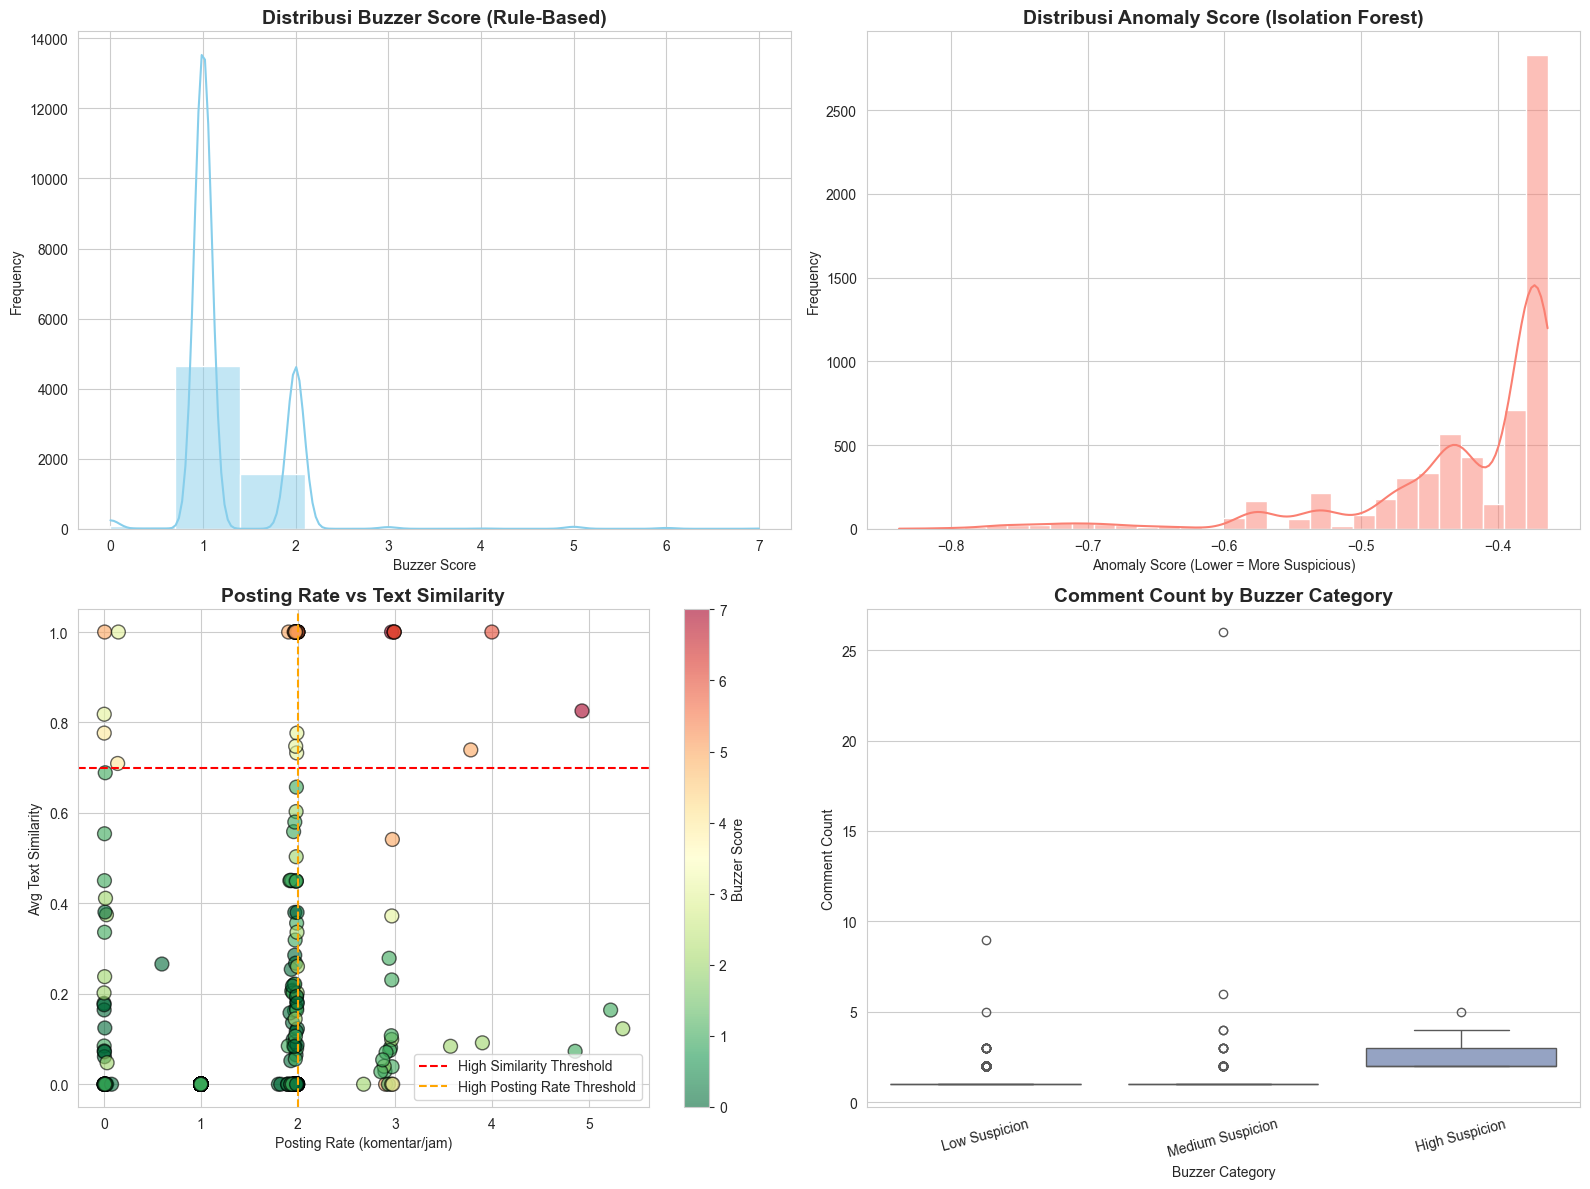

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# 1. Distribusi Buzzer Score
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Distribusi Buzzer Score
sns.histplot(user_activity['buzzer_score'], bins=10, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribusi Buzzer Score (Rule-Based)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Buzzer Score')
axes[0, 0].set_ylabel('Frequency')

# Plot 2: Distribusi Isolation Forest Score
sns.histplot(user_activity['isolation_forest_score'], bins=30, kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Distribusi Anomaly Score (Isolation Forest)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Anomaly Score (Lower = More Suspicious)')
axes[0, 1].set_ylabel('Frequency')

# Plot 3: Scatter - Posting Rate vs Text Similarity
scatter = axes[1, 0].scatter(
    user_activity['posting_rate'], 
    user_activity['avg_text_similarity'],
    c=user_activity['buzzer_score'],
    cmap='RdYlGn_r',
    s=100,
    alpha=0.6,
    edgecolors='black'
)
axes[1, 0].set_title('Posting Rate vs Text Similarity', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Posting Rate (komentar/jam)')
axes[1, 0].set_ylabel('Avg Text Similarity')
axes[1, 0].axhline(y=0.7, color='red', linestyle='--', label='High Similarity Threshold')
axes[1, 0].axvline(x=2, color='orange', linestyle='--', label='High Posting Rate Threshold')
axes[1, 0].legend()
plt.colorbar(scatter, ax=axes[1, 0], label='Buzzer Score')

# Plot 4: Box plot - Comment Count by Category
category_order = ['Low Suspicion', 'Medium Suspicion', 'High Suspicion']
sns.boxplot(
    data=user_activity, 
    x='buzzer_category', 
    y='comment_count',
    order=category_order,
    palette='Set2',
    ax=axes[1, 1]
)
axes[1, 1].set_title('Comment Count by Buzzer Category', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Buzzer Category')
axes[1, 1].set_ylabel('Comment Count')
axes[1, 1].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

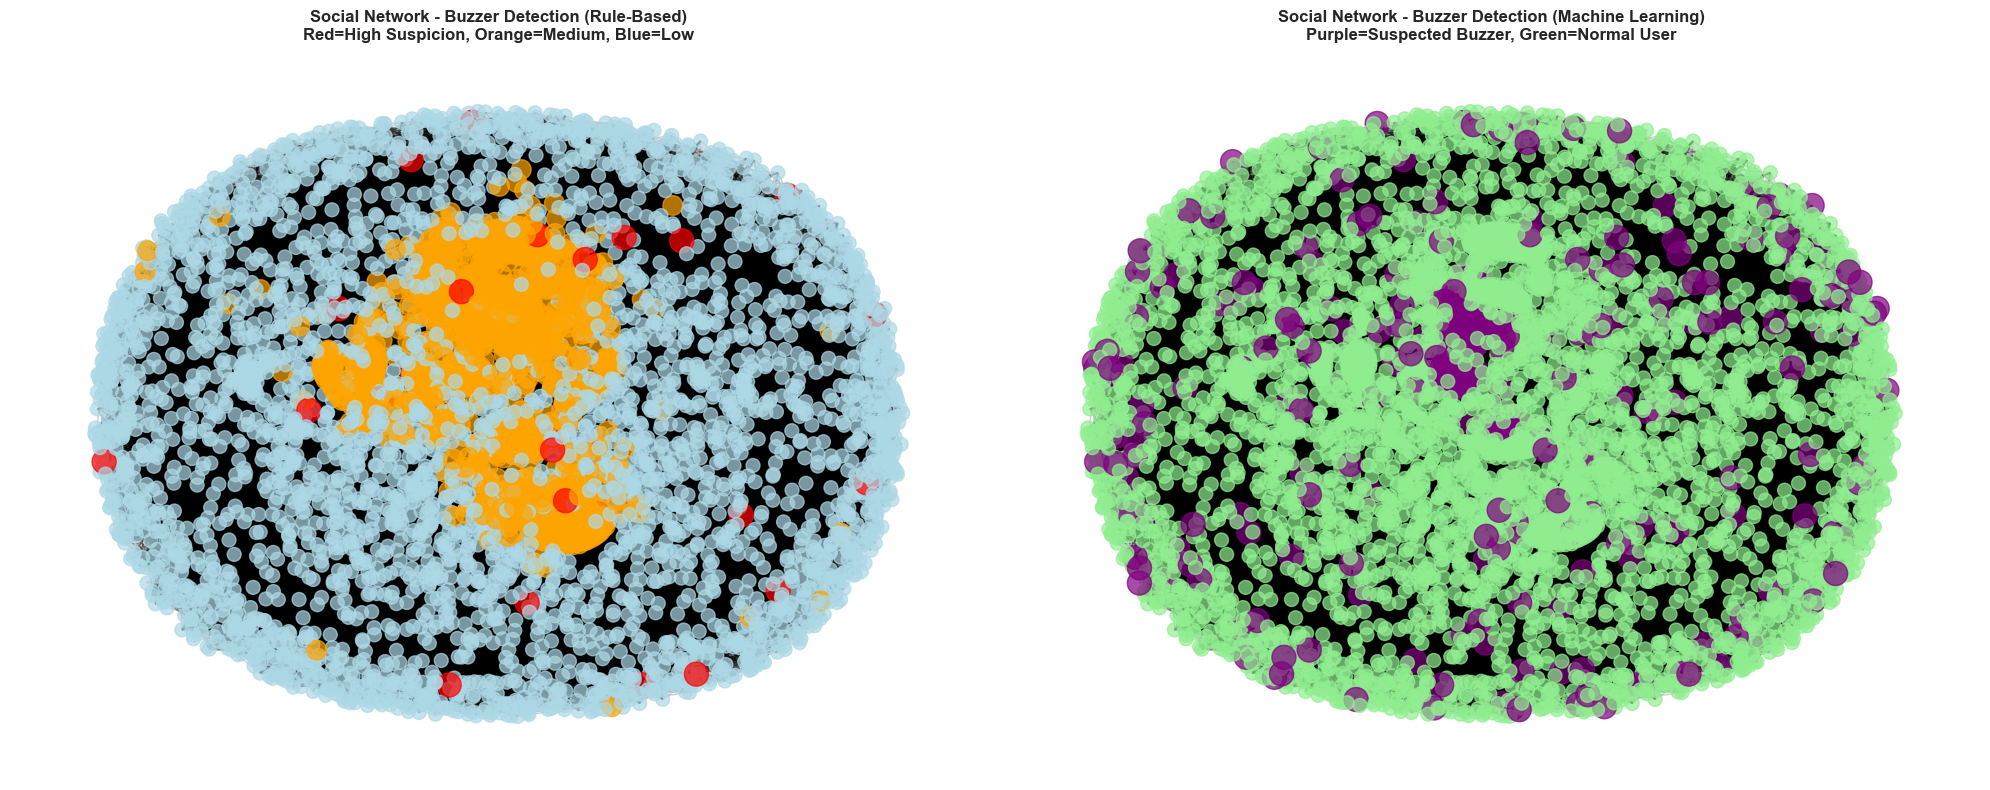

In [25]:
# Visualisasi Network dengan Buzzer Highlighting
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Siapkan node colors berdasarkan kategori
node_colors = []
node_sizes = []

for node in G.nodes():
    if node in user_activity['author'].values:
        user_data = user_activity[user_activity['author'] == node].iloc[0]
        
        # Color berdasarkan kategori
        if user_data['buzzer_category'] == 'High Suspicion':
            node_colors.append('red')
            node_sizes.append(300)
        elif user_data['buzzer_category'] == 'Medium Suspicion':
            node_colors.append('orange')
            node_sizes.append(200)
        else:
            node_colors.append('lightblue')
            node_sizes.append(100)
    else:
        # Bukan author (mungkin post_id)
        node_colors.append('lightgray')
        node_sizes.append(50)

# Plot 1: Network berdasarkan Rule-Based Detection
pos_network = nx.spring_layout(G, k=0.5, iterations=50, seed=42)
nx.draw_networkx_nodes(G, pos_network, node_color=node_colors, node_size=node_sizes, alpha=0.7, ax=axes[0])
nx.draw_networkx_edges(G, pos_network, alpha=0.2, ax=axes[0])
axes[0].set_title('Social Network - Buzzer Detection (Rule-Based)\nRed=High Suspicion, Orange=Medium, Blue=Low', 
                  fontsize=12, fontweight='bold')
axes[0].axis('off')

# Plot 2: Network berdasarkan ML Detection
node_colors_ml = []
node_sizes_ml = []

for node in G.nodes():
    if node in user_activity['author'].values:
        user_data = user_activity[user_activity['author'] == node].iloc[0]
        
        if user_data['ml_buzzer_label'] == 'Suspected Buzzer':
            node_colors_ml.append('purple')
            node_sizes_ml.append(300)
        else:
            node_colors_ml.append('lightgreen')
            node_sizes_ml.append(100)
    else:
        node_colors_ml.append('lightgray')
        node_sizes_ml.append(50)

nx.draw_networkx_nodes(G, pos_network, node_color=node_colors_ml, node_size=node_sizes_ml, alpha=0.7, ax=axes[1])
nx.draw_networkx_edges(G, pos_network, alpha=0.2, ax=axes[1])
axes[1].set_title('Social Network - Buzzer Detection (Machine Learning)\nPurple=Suspected Buzzer, Green=Normal User', 
                  fontsize=12, fontweight='bold')
axes[1].axis('off')

plt.tight_layout()
plt.show()

### 6. Analisis Komentar dari Suspected Buzzers

In [26]:
# Analisis detail komentar dari high confidence buzzers

if len(high_confidence_buzzers) > 0:
    print("=== ANALISIS KOMENTAR DARI HIGH CONFIDENCE BUZZERS ===\n")
    
    # Ambil 3 buzzer teratas
    top_buzzers = high_confidence_buzzers.nlargest(3, 'buzzer_score')
    
    for idx, row in top_buzzers.iterrows():
        author_name = row['author']
        print(f"\n{'='*80}")
        print(f"AUTHOR: {author_name}")
        print(f"{'='*80}")
        print(f"Total Komentar: {row['comment_count']}")
        print(f"Posting Rate: {row['posting_rate']:.2f} komentar/jam")
        print(f"Text Similarity: {row['avg_text_similarity']:.4f}")
        print(f"Duplicate Ratio: {row['duplicate_ratio']:.2%}")
        print(f"Buzzer Score: {row['buzzer_score']}")
        print(f"\n--- SAMPLE KOMENTAR ---")
        
        # Ambil semua komentar dari buzzer ini
        buzzer_comments = merged_data[merged_data['authorDisplayName'] == author_name][['publishedAt', 'textDisplay']].head(10)
        
        for i, comment in buzzer_comments.iterrows():
            print(f"{comment['publishedAt']} | {comment['textDisplay']}")
        
        print("\n")
else:
    print("Tidak ada High Confidence Buzzers yang terdeteksi.")

=== ANALISIS KOMENTAR DARI HIGH CONFIDENCE BUZZERS ===


AUTHOR: @NurZea-z4r
Total Komentar: 5
Posting Rate: 4.93 komentar/jam
Text Similarity: 0.8256
Duplicate Ratio: 60.00%
Buzzer Score: 7

--- SAMPLE KOMENTAR ---
2025-11-06 10:31:28+00:00 | aku sudah dapat mbg gak beracun
2025-11-06 10:31:19+00:00 | aku sudah dapat mbg gak beracun
2025-11-06 10:30:59+00:00 | aku sudah dapat mbg gak beracun
2025-11-06 10:30:58+00:00 | aku sudah dapat mbg
2025-11-06 10:30:36+00:00 | aku sudah dapat mbg



AUTHOR: @VeryIrawan-yl8zk
Total Komentar: 3
Posting Rate: 2.97 komentar/jam
Text Similarity: 1.0000
Duplicate Ratio: 66.67%
Buzzer Score: 7

--- SAMPLE KOMENTAR ---
2025-09-26 08:25:41+00:00 | aku belum dapat
2025-09-26 08:25:00+00:00 | aku belum dapat
2025-09-26 08:25:00+00:00 | aku belum dapat



AUTHOR: @AdrianaWowiling
Total Komentar: 3
Posting Rate: 2.99 komentar/jam
Text Similarity: 1.0000
Duplicate Ratio: 66.67%
Buzzer Score: 6

--- SAMPLE KOMENTAR ---
2025-11-04 10:32:00+00:00 | aku kemarin d

### 7. Export Hasil Deteksi

In [27]:
# Export hasil ke CSV untuk analisis lebih lanjut
output_file = 'buzzer_detection_results.csv'

# Siapkan data untuk export
export_data = user_activity[[
    'author', 
    'comment_count', 
    'posting_rate', 
    'avg_text_similarity',
    'std_text_length',
    'duplicate_ratio',
    'degree_centrality',
    'buzzer_score',
    'buzzer_category',
    'isolation_forest_score',
    'ml_buzzer_label'
]].sort_values('buzzer_score', ascending=False)

# Save to CSV
export_data.to_csv(output_file, index=False)

print(f"✅ Hasil deteksi buzzer berhasil disimpan ke: {output_file}")
print(f"\nTotal users analyzed: {len(export_data)}")
print(f"High Suspicion: {len(export_data[export_data['buzzer_category'] == 'High Suspicion'])}")
print(f"Medium Suspicion: {len(export_data[export_data['buzzer_category'] == 'Medium Suspicion'])}")
print(f"Low Suspicion: {len(export_data[export_data['buzzer_category'] == 'Low Suspicion'])}")
print(f"\nML Suspected Buzzers: {len(export_data[export_data['ml_buzzer_label'] == 'Suspected Buzzer'])}")
print(f"ML Normal Users: {len(export_data[export_data['ml_buzzer_label'] == 'Normal User'])}")

✅ Hasil deteksi buzzer berhasil disimpan ke: buzzer_detection_results.csv

Total users analyzed: 6340
High Suspicion: 32
Medium Suspicion: 1583
Low Suspicion: 4725

ML Suspected Buzzers: 583
ML Normal Users: 5757


### 8. Kesimpulan & Interpretasi Hasil

In [28]:
print("""
================================================================================
                    KESIMPULAN DETEKSI BUZZER MBG
================================================================================

📊 METODOLOGI:
   Menggunakan 2 pendekatan komplementer:
   1. Rule-Based Detection (Scoring System dengan 6 kriteria)
   2. Machine Learning (Isolation Forest untuk Anomaly Detection)

🎯 KRITERIA DETEKSI BUZZER:
   ✓ Posting Rate Tinggi (>2 komentar/jam)
   ✓ Text Similarity Tinggi (>0.7 - indikasi copy-paste)
   ✓ Volume Komentar Tinggi (>10 komentar)
   ✓ Variasi Teks Rendah (std length <2)
   ✓ Adanya Komentar Duplikat
   ✓ Network Centrality Tinggi (terhubung dengan banyak node)

📈 HASIL DETEKSI:
""")

# Print summary statistics
print(f"   Total Users Analyzed: {len(user_activity)}")
print(f"\n   RULE-BASED DETECTION:")
print(f"   • High Suspicion:   {len(user_activity[user_activity['buzzer_category'] == 'High Suspicion'])} users ({len(user_activity[user_activity['buzzer_category'] == 'High Suspicion'])/len(user_activity)*100:.1f}%)")
print(f"   • Medium Suspicion: {len(user_activity[user_activity['buzzer_category'] == 'Medium Suspicion'])} users ({len(user_activity[user_activity['buzzer_category'] == 'Medium Suspicion'])/len(user_activity)*100:.1f}%)")
print(f"   • Low Suspicion:    {len(user_activity[user_activity['buzzer_category'] == 'Low Suspicion'])} users ({len(user_activity[user_activity['buzzer_category'] == 'Low Suspicion'])/len(user_activity)*100:.1f}%)")

print(f"\n   MACHINE LEARNING (Isolation Forest):")
print(f"   • Suspected Buzzer: {len(user_activity[user_activity['ml_buzzer_label'] == 'Suspected Buzzer'])} users ({len(user_activity[user_activity['ml_buzzer_label'] == 'Suspected Buzzer'])/len(user_activity)*100:.1f}%)")
print(f"   • Normal User:      {len(user_activity[user_activity['ml_buzzer_label'] == 'Normal User'])} users ({len(user_activity[user_activity['ml_buzzer_label'] == 'Normal User'])/len(user_activity)*100:.1f}%)")

if len(high_confidence_buzzers) > 0:
    print(f"\n   🚨 HIGH CONFIDENCE BUZZERS (terdeteksi kedua metode): {len(high_confidence_buzzers)} users")

print("""
💡 INTERPRETASI:
   • Buzzer biasanya menunjukkan pola posting yang tidak natural
   • Copy-paste konten adalah indikator kuat aktivitas buzzer
   • Kombinasi multiple indicators meningkatkan confidence level
   • Validasi manual tetap diperlukan untuk konfirmasi final

⚠️  LIMITASI:
   • Data tidak memiliki metadata akun (umur akun, history, dll)
   • Tidak ada informasi reply structure (parent-child comments)
   • Engagement data (likeCount) mayoritas 0
   • Deteksi bersifat probabilistik, bukan definitif

✅ REKOMENDASI:
   1. Review manual untuk High Confidence Buzzers
   2. Analisis temporal pattern lebih detail (burst detection)
   3. Validasi dengan ground truth jika tersedia
   4. Monitoring berkelanjutan untuk pattern baru

================================================================================
""")

print(f"\n📁 File output: buzzer_detection_results.csv")
print(f"🌐 Network graph: author_text_sna.gexf")


                    KESIMPULAN DETEKSI BUZZER MBG

📊 METODOLOGI:
   Menggunakan 2 pendekatan komplementer:
   1. Rule-Based Detection (Scoring System dengan 6 kriteria)
   2. Machine Learning (Isolation Forest untuk Anomaly Detection)

🎯 KRITERIA DETEKSI BUZZER:
   ✓ Posting Rate Tinggi (>2 komentar/jam)
   ✓ Text Similarity Tinggi (>0.7 - indikasi copy-paste)
   ✓ Volume Komentar Tinggi (>10 komentar)
   ✓ Variasi Teks Rendah (std length <2)
   ✓ Adanya Komentar Duplikat
   ✓ Network Centrality Tinggi (terhubung dengan banyak node)

📈 HASIL DETEKSI:

   Total Users Analyzed: 6340

   RULE-BASED DETECTION:
   • High Suspicion:   32 users (0.5%)
   • Medium Suspicion: 1583 users (25.0%)
   • Low Suspicion:    4725 users (74.5%)

   MACHINE LEARNING (Isolation Forest):
   • Suspected Buzzer: 583 users (9.2%)
   • Normal User:      5757 users (90.8%)

   🚨 HIGH CONFIDENCE BUZZERS (terdeteksi kedua metode): 32 users

💡 INTERPRETASI:
   • Buzzer biasanya menunjukkan pola posting yang tidak